In [32]:
import torch 
from torch import nn
from data import create_fish_dataloaders_separate, create_test_dataloader
from model import FishSegmentation
from tqdm import tqdm 
import matplotlib.pyplot as plt


In [ ]:
def train(model , epochs , train_dataloaders , valid_dataloaders, optimizer, loss=None):
    
   
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    print(f"Training on: {device}")
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    print(f"Initial learning rate: {optimizer.param_groups[0]['lr']}")

    
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    
    print("Training started...\n")
    
    for epoch in range(epochs):
        
        # Training Phase
        model.train()
        running_train_loss = 0.0
        
        train_bar = tqdm(
            train_dataloaders, 
            desc=f"Epoch {epoch+1}/{epochs} - Training",
            leave=True 
        )
        
        for batch_idx, (image, mask, _) in enumerate(train_bar):
            image, mask = image.to(device), mask.to(device)
            
            optimizer.zero_grad()
            predicted = model(image)
            loss= nn.BCELoss()(predicted,mask)
            loss.backward()
            optimizer.step()
            
            batch_loss = loss.item()
            running_train_loss += batch_loss
            
            # Update display
            train_bar.set_postfix({
                'Loss': f'{running_train_loss:.4f}',
            
            })
        
        avg_train_loss = running_train_loss / len(train_dataloaders)
        train_losses.append(avg_train_loss)
        
        # Validation Phase
        model.eval()
        running_val_loss = 0.0
        
        val_bar = tqdm(
            valid_dataloaders, 
            desc=f"Epoch {epoch+1}/{epochs} - Validation",
            leave=False
        )
        
        with torch.no_grad():
            for batch_idx, (image_valid, mask_valid, labels) in enumerate(val_bar):
                image_valid, mask_valid = image_valid.to(device), mask_valid.to(device)
                
                predicted = model(image_valid)
                loss = nn.BCELoss()(predicted, mask_valid)
                running_val_loss += loss.item()
                
                val_bar.set_postfix({
                    'Loss': f'{running_val_loss:.4f}',
                    
                })
        
        avg_val_loss = running_val_loss / len(valid_dataloaders)
        val_losses.append(avg_val_loss)
    
        
        print(f'\nEpoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {avg_train_loss:.4f}')
        print(f'Val Loss: {avg_val_loss:.4f}')
       
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
                'best_val_loss': best_val_loss,
                
                'train_losses': train_losses,
                'val_losses': val_losses,
            }, 'best_fish_segmentation_model.pth')
            print(f'✅ Best model saved! Val Loss: {avg_val_loss:.4f}')
        
        print('-' * 50)
    
    print(f"\n🎉 Training completed! Best validation loss: {best_val_loss:.4f}")
    return train_losses, val_losses

In [9]:
train_dataloaders, valid_dataloaders, categories = create_fish_dataloaders_separate()


Found 9000 samples across 9 categories


In [70]:
model = FishSegmentation()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_dataloaders, valid_dataloaders, _ = create_fish_dataloaders_separate(train_batch_size=96, val_batch_size=96, val_split=0.1)
train_loss , valid_loss = train(model , 500 , train_dataloaders , valid_dataloaders, optimizer)

Found 9000 samples across 9 categories
Training on: cuda
Model parameters: 7,696,193
Initial learning rate: 0.001
Training started...



Epoch 1/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=35.9198]



Epoch 1/500:
Train Loss: 0.4226
Val Loss: 0.3442
✅ Best model saved! Val Loss: 0.3442
--------------------------------------------------


Epoch 2/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=33.4062]



Epoch 2/500:
Train Loss: 0.3930
Val Loss: 0.3171
✅ Best model saved! Val Loss: 0.3171
--------------------------------------------------


Epoch 3/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=22.9128]



Epoch 3/500:
Train Loss: 0.2696
Val Loss: 0.2296
✅ Best model saved! Val Loss: 0.2296
--------------------------------------------------


Epoch 4/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=15.4716]



Epoch 4/500:
Train Loss: 0.1820
Val Loss: 0.1569
✅ Best model saved! Val Loss: 0.1569
--------------------------------------------------


Epoch 5/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=13.3492]



Epoch 5/500:
Train Loss: 0.1570
Val Loss: 0.1351
✅ Best model saved! Val Loss: 0.1351
--------------------------------------------------


Epoch 6/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=10.6647]



Epoch 6/500:
Train Loss: 0.1255
Val Loss: 0.1347
✅ Best model saved! Val Loss: 0.1347
--------------------------------------------------


Epoch 7/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=10.1459]



Epoch 7/500:
Train Loss: 0.1194
Val Loss: 0.1094
✅ Best model saved! Val Loss: 0.1094
--------------------------------------------------


Epoch 8/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=8.6935]



Epoch 8/500:
Train Loss: 0.1023
Val Loss: 0.1011
✅ Best model saved! Val Loss: 0.1011
--------------------------------------------------


Epoch 9/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=7.7016]



Epoch 9/500:
Train Loss: 0.0906
Val Loss: 0.1029
--------------------------------------------------


Epoch 10/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=7.2094]



Epoch 10/500:
Train Loss: 0.0848
Val Loss: 0.0858
✅ Best model saved! Val Loss: 0.0858
--------------------------------------------------


Epoch 11/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.6403]



Epoch 11/500:
Train Loss: 0.0781
Val Loss: 0.0780
✅ Best model saved! Val Loss: 0.0780
--------------------------------------------------


Epoch 12/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.1402]



Epoch 12/500:
Train Loss: 0.0722
Val Loss: 0.0715
✅ Best model saved! Val Loss: 0.0715
--------------------------------------------------


Epoch 13/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=5.7349]



Epoch 13/500:
Train Loss: 0.0675
Val Loss: 0.0687
✅ Best model saved! Val Loss: 0.0687
--------------------------------------------------


Epoch 14/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.2715]



Epoch 14/500:
Train Loss: 0.0620
Val Loss: 0.0665
✅ Best model saved! Val Loss: 0.0665
--------------------------------------------------


Epoch 15/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.0922]



Epoch 15/500:
Train Loss: 0.0599
Val Loss: 0.0654
✅ Best model saved! Val Loss: 0.0654
--------------------------------------------------


Epoch 16/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.8303]



Epoch 16/500:
Train Loss: 0.0568
Val Loss: 0.0600
✅ Best model saved! Val Loss: 0.0600
--------------------------------------------------


Epoch 17/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=4.4670]



Epoch 17/500:
Train Loss: 0.0526
Val Loss: 0.0579
✅ Best model saved! Val Loss: 0.0579
--------------------------------------------------


Epoch 18/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.5128]



Epoch 18/500:
Train Loss: 0.0531
Val Loss: 0.0573
✅ Best model saved! Val Loss: 0.0573
--------------------------------------------------


Epoch 19/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=4.3705]



Epoch 19/500:
Train Loss: 0.0514
Val Loss: 0.0570
✅ Best model saved! Val Loss: 0.0570
--------------------------------------------------


Epoch 20/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.0531]



Epoch 20/500:
Train Loss: 0.0477
Val Loss: 0.0535
✅ Best model saved! Val Loss: 0.0535
--------------------------------------------------


Epoch 21/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.7765]



Epoch 21/500:
Train Loss: 0.0444
Val Loss: 0.0503
✅ Best model saved! Val Loss: 0.0503
--------------------------------------------------


Epoch 22/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=3.7134]



Epoch 22/500:
Train Loss: 0.0437
Val Loss: 0.0504
--------------------------------------------------


Epoch 23/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.5777]



Epoch 23/500:
Train Loss: 0.0421
Val Loss: 0.0478
✅ Best model saved! Val Loss: 0.0478
--------------------------------------------------


Epoch 24/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=3.5239]



Epoch 24/500:
Train Loss: 0.0415
Val Loss: 0.0452
✅ Best model saved! Val Loss: 0.0452
--------------------------------------------------


Epoch 25/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=3.5601]



Epoch 25/500:
Train Loss: 0.0419
Val Loss: 0.0440
✅ Best model saved! Val Loss: 0.0440
--------------------------------------------------


Epoch 26/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=3.2628]



Epoch 26/500:
Train Loss: 0.0384
Val Loss: 0.0451
--------------------------------------------------


Epoch 27/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.1251]



Epoch 27/500:
Train Loss: 0.0368
Val Loss: 0.0424
✅ Best model saved! Val Loss: 0.0424
--------------------------------------------------


Epoch 28/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.9837]



Epoch 28/500:
Train Loss: 0.0351
Val Loss: 0.0430
--------------------------------------------------


Epoch 29/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9504]



Epoch 29/500:
Train Loss: 0.0347
Val Loss: 0.0439
--------------------------------------------------


Epoch 30/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7802]



Epoch 30/500:
Train Loss: 0.0327
Val Loss: 0.0428
--------------------------------------------------


Epoch 31/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2600]



Epoch 31/500:
Train Loss: 0.0384
Val Loss: 0.0547
--------------------------------------------------


Epoch 32/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9263]



Epoch 32/500:
Train Loss: 0.0344
Val Loss: 0.0401
✅ Best model saved! Val Loss: 0.0401
--------------------------------------------------


Epoch 33/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.5274]



Epoch 33/500:
Train Loss: 0.0297
Val Loss: 0.0389
✅ Best model saved! Val Loss: 0.0389
--------------------------------------------------


Epoch 34/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.5042]



Epoch 34/500:
Train Loss: 0.0295
Val Loss: 0.0383
✅ Best model saved! Val Loss: 0.0383
--------------------------------------------------


Epoch 35/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.2736]



Epoch 35/500:
Train Loss: 0.0267
Val Loss: 0.0378
✅ Best model saved! Val Loss: 0.0378
--------------------------------------------------


Epoch 36/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.2276]



Epoch 36/500:
Train Loss: 0.0262
Val Loss: 0.0371
✅ Best model saved! Val Loss: 0.0371
--------------------------------------------------


Epoch 37/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.1572]



Epoch 37/500:
Train Loss: 0.0254
Val Loss: 0.0379
--------------------------------------------------


Epoch 38/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1456]



Epoch 38/500:
Train Loss: 0.0252
Val Loss: 0.0391
--------------------------------------------------


Epoch 39/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3519]



Epoch 39/500:
Train Loss: 0.0277
Val Loss: 0.0373
--------------------------------------------------


Epoch 40/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1032]



Epoch 40/500:
Train Loss: 0.0247
Val Loss: 0.0362
✅ Best model saved! Val Loss: 0.0362
--------------------------------------------------


Epoch 41/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=1.8930]



Epoch 41/500:
Train Loss: 0.0223
Val Loss: 0.0368
--------------------------------------------------


Epoch 42/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8799]



Epoch 42/500:
Train Loss: 0.0221
Val Loss: 0.0372
--------------------------------------------------


Epoch 43/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8849]



Epoch 43/500:
Train Loss: 0.0222
Val Loss: 0.0384
--------------------------------------------------


Epoch 44/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8012]



Epoch 44/500:
Train Loss: 0.0212
Val Loss: 0.0359
✅ Best model saved! Val Loss: 0.0359
--------------------------------------------------


Epoch 45/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7025]



Epoch 45/500:
Train Loss: 0.0200
Val Loss: 0.0363
--------------------------------------------------


Epoch 46/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6209]



Epoch 46/500:
Train Loss: 0.0191
Val Loss: 0.0343
✅ Best model saved! Val Loss: 0.0343
--------------------------------------------------


Epoch 47/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=1.6979]



Epoch 47/500:
Train Loss: 0.0200
Val Loss: 0.0360
--------------------------------------------------


Epoch 48/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6412]



Epoch 48/500:
Train Loss: 0.0193
Val Loss: 0.0358
--------------------------------------------------


Epoch 49/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4856]



Epoch 49/500:
Train Loss: 0.0175
Val Loss: 0.0360
--------------------------------------------------


Epoch 50/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4510]



Epoch 50/500:
Train Loss: 0.0171
Val Loss: 0.0398
--------------------------------------------------


Epoch 51/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4766]



Epoch 51/500:
Train Loss: 0.0174
Val Loss: 0.0337
✅ Best model saved! Val Loss: 0.0337
--------------------------------------------------


Epoch 52/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=1.3704]



Epoch 52/500:
Train Loss: 0.0161
Val Loss: 0.0368
--------------------------------------------------


Epoch 53/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4221]



Epoch 53/500:
Train Loss: 0.0167
Val Loss: 0.0342
--------------------------------------------------


Epoch 54/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4394]



Epoch 54/500:
Train Loss: 0.0169
Val Loss: 0.0363
--------------------------------------------------


Epoch 55/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3118]



Epoch 55/500:
Train Loss: 0.0154
Val Loss: 0.0363
--------------------------------------------------


Epoch 56/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2680]



Epoch 56/500:
Train Loss: 0.0149
Val Loss: 0.0357
--------------------------------------------------


Epoch 57/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1995]



Epoch 57/500:
Train Loss: 0.0141
Val Loss: 0.0353
--------------------------------------------------


Epoch 58/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1802]



Epoch 58/500:
Train Loss: 0.0139
Val Loss: 0.0344
--------------------------------------------------


Epoch 59/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2634]



Epoch 59/500:
Train Loss: 0.0149
Val Loss: 0.0345
--------------------------------------------------


Epoch 60/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=37.6160]



Epoch 60/500:
Train Loss: 0.4425
Val Loss: 0.3648
--------------------------------------------------


Epoch 61/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=24.4143]



Epoch 61/500:
Train Loss: 0.2872
Val Loss: 0.2112
--------------------------------------------------


Epoch 62/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=15.1528]



Epoch 62/500:
Train Loss: 0.1783
Val Loss: 0.1528
--------------------------------------------------


Epoch 63/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=11.4698]



Epoch 63/500:
Train Loss: 0.1349
Val Loss: 0.1189
--------------------------------------------------


Epoch 64/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=8.9676]



Epoch 64/500:
Train Loss: 0.1055
Val Loss: 0.1023
--------------------------------------------------


Epoch 65/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=7.7241]



Epoch 65/500:
Train Loss: 0.0909
Val Loss: 0.0905
--------------------------------------------------


Epoch 66/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.8869]



Epoch 66/500:
Train Loss: 0.0810
Val Loss: 0.0781
--------------------------------------------------


Epoch 67/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.1025]



Epoch 67/500:
Train Loss: 0.0718
Val Loss: 0.0934
--------------------------------------------------


Epoch 68/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=9.2927]



Epoch 68/500:
Train Loss: 0.1093
Val Loss: 0.0818
--------------------------------------------------


Epoch 69/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.1815]



Epoch 69/500:
Train Loss: 0.0727
Val Loss: 0.0733
--------------------------------------------------


Epoch 70/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.5036]



Epoch 70/500:
Train Loss: 0.0647
Val Loss: 0.0685
--------------------------------------------------


Epoch 71/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.1627]



Epoch 71/500:
Train Loss: 0.0607
Val Loss: 0.0633
--------------------------------------------------


Epoch 72/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.8244]



Epoch 72/500:
Train Loss: 0.0568
Val Loss: 0.0603
--------------------------------------------------


Epoch 73/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.6444]



Epoch 73/500:
Train Loss: 0.0546
Val Loss: 0.0593
--------------------------------------------------


Epoch 74/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.4272]



Epoch 74/500:
Train Loss: 0.0521
Val Loss: 0.0562
--------------------------------------------------


Epoch 75/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.2508]



Epoch 75/500:
Train Loss: 0.0500
Val Loss: 0.0533
--------------------------------------------------


Epoch 76/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.0948]



Epoch 76/500:
Train Loss: 0.0482
Val Loss: 0.0529
--------------------------------------------------


Epoch 77/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.9685]



Epoch 77/500:
Train Loss: 0.0467
Val Loss: 0.0509
--------------------------------------------------


Epoch 78/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.8267]



Epoch 78/500:
Train Loss: 0.0450
Val Loss: 0.0501
--------------------------------------------------


Epoch 79/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.6543]



Epoch 79/500:
Train Loss: 0.0430
Val Loss: 0.0502
--------------------------------------------------


Epoch 80/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.5553]



Epoch 80/500:
Train Loss: 0.0418
Val Loss: 0.0480
--------------------------------------------------


Epoch 81/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.4575]



Epoch 81/500:
Train Loss: 0.0407
Val Loss: 0.0481
--------------------------------------------------


Epoch 82/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.3218]



Epoch 82/500:
Train Loss: 0.0391
Val Loss: 0.0467
--------------------------------------------------


Epoch 83/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2973]



Epoch 83/500:
Train Loss: 0.0388
Val Loss: 0.0463
--------------------------------------------------


Epoch 84/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.1540]



Epoch 84/500:
Train Loss: 0.0371
Val Loss: 0.0465
--------------------------------------------------


Epoch 85/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.1849]



Epoch 85/500:
Train Loss: 0.0375
Val Loss: 0.0453
--------------------------------------------------


Epoch 86/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.0582]



Epoch 86/500:
Train Loss: 0.0360
Val Loss: 0.0436
--------------------------------------------------


Epoch 87/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.8267]



Epoch 87/500:
Train Loss: 0.0333
Val Loss: 0.0429
--------------------------------------------------


Epoch 88/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7213]



Epoch 88/500:
Train Loss: 0.0320
Val Loss: 0.0430
--------------------------------------------------


Epoch 89/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.8047]



Epoch 89/500:
Train Loss: 0.0330
Val Loss: 0.0424
--------------------------------------------------


Epoch 90/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.6053]



Epoch 90/500:
Train Loss: 0.0307
Val Loss: 0.0421
--------------------------------------------------


Epoch 91/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5117]



Epoch 91/500:
Train Loss: 0.0295
Val Loss: 0.0422
--------------------------------------------------


Epoch 92/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.4293]



Epoch 92/500:
Train Loss: 0.0286
Val Loss: 0.0436
--------------------------------------------------


Epoch 93/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3797]



Epoch 93/500:
Train Loss: 0.0280
Val Loss: 0.0396
--------------------------------------------------


Epoch 94/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3167]



Epoch 94/500:
Train Loss: 0.0273
Val Loss: 0.0403
--------------------------------------------------


Epoch 95/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2275]



Epoch 95/500:
Train Loss: 0.0262
Val Loss: 0.0389
--------------------------------------------------


Epoch 96/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1544]



Epoch 96/500:
Train Loss: 0.0253
Val Loss: 0.0397
--------------------------------------------------


Epoch 97/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1296]



Epoch 97/500:
Train Loss: 0.0251
Val Loss: 0.0381
--------------------------------------------------


Epoch 98/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1660]



Epoch 98/500:
Train Loss: 0.0255
Val Loss: 0.0423
--------------------------------------------------


Epoch 99/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3076]



Epoch 99/500:
Train Loss: 0.0271
Val Loss: 0.0388
--------------------------------------------------


Epoch 100/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0241]



Epoch 100/500:
Train Loss: 0.0238
Val Loss: 0.0380
--------------------------------------------------


Epoch 101/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0621]



Epoch 101/500:
Train Loss: 0.0243
Val Loss: 0.0392
--------------------------------------------------


Epoch 102/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8930]



Epoch 102/500:
Train Loss: 0.0223
Val Loss: 0.0388
--------------------------------------------------


Epoch 103/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7822]



Epoch 103/500:
Train Loss: 0.0210
Val Loss: 0.0378
--------------------------------------------------


Epoch 104/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7209]



Epoch 104/500:
Train Loss: 0.0202
Val Loss: 0.0385
--------------------------------------------------


Epoch 105/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6770]



Epoch 105/500:
Train Loss: 0.0197
Val Loss: 0.0385
--------------------------------------------------


Epoch 106/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6167]



Epoch 106/500:
Train Loss: 0.0190
Val Loss: 0.0393
--------------------------------------------------


Epoch 107/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6921]



Epoch 107/500:
Train Loss: 0.0199
Val Loss: 0.0385
--------------------------------------------------


Epoch 108/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5855]



Epoch 108/500:
Train Loss: 0.0187
Val Loss: 0.0383
--------------------------------------------------


Epoch 109/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5232]



Epoch 109/500:
Train Loss: 0.0179
Val Loss: 0.0387
--------------------------------------------------


Epoch 110/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4947]



Epoch 110/500:
Train Loss: 0.0176
Val Loss: 0.0396
--------------------------------------------------


Epoch 111/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4805]



Epoch 111/500:
Train Loss: 0.0174
Val Loss: 0.0405
--------------------------------------------------


Epoch 112/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7904]



Epoch 112/500:
Train Loss: 0.0211
Val Loss: 0.0411
--------------------------------------------------


Epoch 113/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5958]



Epoch 113/500:
Train Loss: 0.0188
Val Loss: 0.0396
--------------------------------------------------


Epoch 114/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4414]



Epoch 114/500:
Train Loss: 0.0170
Val Loss: 0.0388
--------------------------------------------------


Epoch 115/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3750]



Epoch 115/500:
Train Loss: 0.0162
Val Loss: 0.0383
--------------------------------------------------


Epoch 116/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3581]



Epoch 116/500:
Train Loss: 0.0160
Val Loss: 0.0406
--------------------------------------------------


Epoch 117/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3915]



Epoch 117/500:
Train Loss: 0.0164
Val Loss: 0.0398
--------------------------------------------------


Epoch 118/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3117]



Epoch 118/500:
Train Loss: 0.0154
Val Loss: 0.0404
--------------------------------------------------


Epoch 119/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2589]



Epoch 119/500:
Train Loss: 0.0148
Val Loss: 0.0406
--------------------------------------------------


Epoch 120/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2582]



Epoch 120/500:
Train Loss: 0.0148
Val Loss: 0.0402
--------------------------------------------------


Epoch 121/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2781]



Epoch 121/500:
Train Loss: 0.0150
Val Loss: 0.0419
--------------------------------------------------


Epoch 122/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=13.5414]



Epoch 122/500:
Train Loss: 0.1593
Val Loss: 0.3491
--------------------------------------------------


Epoch 123/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=18.8147]



Epoch 123/500:
Train Loss: 0.2213
Val Loss: 0.1538
--------------------------------------------------


Epoch 124/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=10.1985]



Epoch 124/500:
Train Loss: 0.1200
Val Loss: 0.0993
--------------------------------------------------


Epoch 125/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=7.6929]



Epoch 125/500:
Train Loss: 0.0905
Val Loss: 0.0993
--------------------------------------------------


Epoch 126/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.7631]



Epoch 126/500:
Train Loss: 0.0796
Val Loss: 0.0762
--------------------------------------------------


Epoch 127/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.7294]



Epoch 127/500:
Train Loss: 0.0674
Val Loss: 0.0678
--------------------------------------------------


Epoch 128/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.3844]



Epoch 128/500:
Train Loss: 0.0633
Val Loss: 0.0646
--------------------------------------------------


Epoch 129/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.0598]



Epoch 129/500:
Train Loss: 0.0595
Val Loss: 0.0612
--------------------------------------------------


Epoch 130/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.6813]



Epoch 130/500:
Train Loss: 0.0551
Val Loss: 0.0629
--------------------------------------------------


Epoch 131/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.5470]



Epoch 131/500:
Train Loss: 0.0535
Val Loss: 0.0568
--------------------------------------------------


Epoch 132/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.3376]



Epoch 132/500:
Train Loss: 0.0510
Val Loss: 0.0535
--------------------------------------------------


Epoch 133/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.1373]



Epoch 133/500:
Train Loss: 0.0487
Val Loss: 0.0531
--------------------------------------------------


Epoch 134/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.0276]



Epoch 134/500:
Train Loss: 0.0474
Val Loss: 0.0497
--------------------------------------------------


Epoch 135/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.8808]



Epoch 135/500:
Train Loss: 0.0457
Val Loss: 0.0511
--------------------------------------------------


Epoch 136/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.7165]



Epoch 136/500:
Train Loss: 0.0437
Val Loss: 0.0486
--------------------------------------------------


Epoch 137/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.6902]



Epoch 137/500:
Train Loss: 0.0434
Val Loss: 0.0486
--------------------------------------------------


Epoch 138/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.4934]



Epoch 138/500:
Train Loss: 0.0411
Val Loss: 0.0467
--------------------------------------------------


Epoch 139/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.4405]



Epoch 139/500:
Train Loss: 0.0405
Val Loss: 0.0474
--------------------------------------------------


Epoch 140/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2894]



Epoch 140/500:
Train Loss: 0.0387
Val Loss: 0.0492
--------------------------------------------------


Epoch 141/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2558]



Epoch 141/500:
Train Loss: 0.0383
Val Loss: 0.0454
--------------------------------------------------


Epoch 142/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2043]



Epoch 142/500:
Train Loss: 0.0377
Val Loss: 0.0433
--------------------------------------------------


Epoch 143/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.0626]



Epoch 143/500:
Train Loss: 0.0360
Val Loss: 0.0423
--------------------------------------------------


Epoch 144/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9645]



Epoch 144/500:
Train Loss: 0.0349
Val Loss: 0.0436
--------------------------------------------------


Epoch 145/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9050]



Epoch 145/500:
Train Loss: 0.0342
Val Loss: 0.0425
--------------------------------------------------


Epoch 146/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.8284]



Epoch 146/500:
Train Loss: 0.0333
Val Loss: 0.0423
--------------------------------------------------


Epoch 147/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7986]



Epoch 147/500:
Train Loss: 0.0329
Val Loss: 0.0393
--------------------------------------------------


Epoch 148/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.6965]



Epoch 148/500:
Train Loss: 0.0317
Val Loss: 0.0401
--------------------------------------------------


Epoch 149/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7170]



Epoch 149/500:
Train Loss: 0.0320
Val Loss: 0.0388
--------------------------------------------------


Epoch 150/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.6118]



Epoch 150/500:
Train Loss: 0.0307
Val Loss: 0.0391
--------------------------------------------------


Epoch 151/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5317]



Epoch 151/500:
Train Loss: 0.0298
Val Loss: 0.0399
--------------------------------------------------


Epoch 152/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5306]



Epoch 152/500:
Train Loss: 0.0298
Val Loss: 0.0486
--------------------------------------------------


Epoch 153/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2683]



Epoch 153/500:
Train Loss: 0.0385
Val Loss: 0.0397
--------------------------------------------------


Epoch 154/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.4275]



Epoch 154/500:
Train Loss: 0.0286
Val Loss: 0.0376
--------------------------------------------------


Epoch 155/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3089]



Epoch 155/500:
Train Loss: 0.0272
Val Loss: 0.0378
--------------------------------------------------


Epoch 156/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2529]



Epoch 156/500:
Train Loss: 0.0265
Val Loss: 0.0378
--------------------------------------------------


Epoch 157/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2013]



Epoch 157/500:
Train Loss: 0.0259
Val Loss: 0.0386
--------------------------------------------------


Epoch 158/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1617]



Epoch 158/500:
Train Loss: 0.0254
Val Loss: 0.0394
--------------------------------------------------


Epoch 159/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1789]



Epoch 159/500:
Train Loss: 0.0256
Val Loss: 0.0373
--------------------------------------------------


Epoch 160/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0844]



Epoch 160/500:
Train Loss: 0.0245
Val Loss: 0.0385
--------------------------------------------------


Epoch 161/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0862]



Epoch 161/500:
Train Loss: 0.0245
Val Loss: 0.0363
--------------------------------------------------


Epoch 162/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9682]



Epoch 162/500:
Train Loss: 0.0232
Val Loss: 0.0367
--------------------------------------------------


Epoch 163/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9710]



Epoch 163/500:
Train Loss: 0.0232
Val Loss: 0.0383
--------------------------------------------------


Epoch 164/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9221]



Epoch 164/500:
Train Loss: 0.0226
Val Loss: 0.0390
--------------------------------------------------


Epoch 165/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8456]



Epoch 165/500:
Train Loss: 0.0217
Val Loss: 0.0377
--------------------------------------------------


Epoch 166/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8332]



Epoch 166/500:
Train Loss: 0.0216
Val Loss: 0.0362
--------------------------------------------------


Epoch 167/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8541]



Epoch 167/500:
Train Loss: 0.0218
Val Loss: 0.0362
--------------------------------------------------


Epoch 168/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7705]



Epoch 168/500:
Train Loss: 0.0208
Val Loss: 0.0371
--------------------------------------------------


Epoch 169/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8066]



Epoch 169/500:
Train Loss: 0.0213
Val Loss: 0.0363
--------------------------------------------------


Epoch 170/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7099]



Epoch 170/500:
Train Loss: 0.0201
Val Loss: 0.0368
--------------------------------------------------


Epoch 171/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7787]



Epoch 171/500:
Train Loss: 0.0209
Val Loss: 0.0362
--------------------------------------------------


Epoch 172/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7263]



Epoch 172/500:
Train Loss: 0.0203
Val Loss: 0.0363
--------------------------------------------------


Epoch 173/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6411]



Epoch 173/500:
Train Loss: 0.0193
Val Loss: 0.0361
--------------------------------------------------


Epoch 174/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5456]



Epoch 174/500:
Train Loss: 0.0182
Val Loss: 0.0371
--------------------------------------------------


Epoch 175/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6035]



Epoch 175/500:
Train Loss: 0.0189
Val Loss: 0.0367
--------------------------------------------------


Epoch 176/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5330]



Epoch 176/500:
Train Loss: 0.0180
Val Loss: 0.0360
--------------------------------------------------


Epoch 177/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4927]



Epoch 177/500:
Train Loss: 0.0176
Val Loss: 0.0373
--------------------------------------------------


Epoch 178/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4710]



Epoch 178/500:
Train Loss: 0.0173
Val Loss: 0.0358
--------------------------------------------------


Epoch 179/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4972]



Epoch 179/500:
Train Loss: 0.0176
Val Loss: 0.0370
--------------------------------------------------


Epoch 180/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4803]



Epoch 180/500:
Train Loss: 0.0174
Val Loss: 0.0388
--------------------------------------------------


Epoch 181/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7268]



Epoch 181/500:
Train Loss: 0.0203
Val Loss: 0.0369
--------------------------------------------------


Epoch 182/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5086]



Epoch 182/500:
Train Loss: 0.0177
Val Loss: 0.0384
--------------------------------------------------


Epoch 183/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3885]



Epoch 183/500:
Train Loss: 0.0163
Val Loss: 0.0350
--------------------------------------------------


Epoch 184/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3467]



Epoch 184/500:
Train Loss: 0.0158
Val Loss: 0.0377
--------------------------------------------------


Epoch 185/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3318]



Epoch 185/500:
Train Loss: 0.0157
Val Loss: 0.0365
--------------------------------------------------


Epoch 186/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2969]



Epoch 186/500:
Train Loss: 0.0153
Val Loss: 0.0356
--------------------------------------------------


Epoch 187/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=1.4788]



Epoch 187/500:
Train Loss: 0.0174
Val Loss: 0.0360
--------------------------------------------------


Epoch 188/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3319]



Epoch 188/500:
Train Loss: 0.0157
Val Loss: 0.0367
--------------------------------------------------


Epoch 189/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2317]



Epoch 189/500:
Train Loss: 0.0145
Val Loss: 0.0367
--------------------------------------------------


Epoch 190/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2102]



Epoch 190/500:
Train Loss: 0.0260
Val Loss: 0.0568
--------------------------------------------------


Epoch 191/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1293]



Epoch 191/500:
Train Loss: 0.0251
Val Loss: 0.0354
--------------------------------------------------


Epoch 192/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3513]



Epoch 192/500:
Train Loss: 0.0159
Val Loss: 0.0348
--------------------------------------------------


Epoch 193/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2271]



Epoch 193/500:
Train Loss: 0.0144
Val Loss: 0.0352
--------------------------------------------------


Epoch 194/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1534]



Epoch 194/500:
Train Loss: 0.0136
Val Loss: 0.0373
--------------------------------------------------


Epoch 195/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1307]



Epoch 195/500:
Train Loss: 0.0133
Val Loss: 0.0354
--------------------------------------------------


Epoch 196/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1147]



Epoch 196/500:
Train Loss: 0.0131
Val Loss: 0.0367
--------------------------------------------------


Epoch 197/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0905]



Epoch 197/500:
Train Loss: 0.0128
Val Loss: 0.0373
--------------------------------------------------


Epoch 198/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0794]



Epoch 198/500:
Train Loss: 0.0127
Val Loss: 0.0382
--------------------------------------------------


Epoch 199/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1023]



Epoch 199/500:
Train Loss: 0.0130
Val Loss: 0.0391
--------------------------------------------------


Epoch 200/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1279]



Epoch 200/500:
Train Loss: 0.0133
Val Loss: 0.0380
--------------------------------------------------


Epoch 201/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=1.0737]



Epoch 201/500:
Train Loss: 0.0126
Val Loss: 0.0381
--------------------------------------------------


Epoch 202/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0304]



Epoch 202/500:
Train Loss: 0.0121
Val Loss: 0.0394
--------------------------------------------------


Epoch 203/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0476]



Epoch 203/500:
Train Loss: 0.0123
Val Loss: 0.0416
--------------------------------------------------


Epoch 204/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1893]



Epoch 204/500:
Train Loss: 0.0140
Val Loss: 0.0388
--------------------------------------------------


Epoch 205/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0904]



Epoch 205/500:
Train Loss: 0.0128
Val Loss: 0.0380
--------------------------------------------------


Epoch 206/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0606]



Epoch 206/500:
Train Loss: 0.0125
Val Loss: 0.0373
--------------------------------------------------


Epoch 207/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0101]



Epoch 207/500:
Train Loss: 0.0119
Val Loss: 0.0383
--------------------------------------------------


Epoch 208/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9917]



Epoch 208/500:
Train Loss: 0.0117
Val Loss: 0.0400
--------------------------------------------------


Epoch 209/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0385]



Epoch 209/500:
Train Loss: 0.0122
Val Loss: 0.0396
--------------------------------------------------


Epoch 210/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0824]



Epoch 210/500:
Train Loss: 0.0127
Val Loss: 0.0390
--------------------------------------------------


Epoch 211/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0670]



Epoch 211/500:
Train Loss: 0.0126
Val Loss: 0.0390
--------------------------------------------------


Epoch 212/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1595]



Epoch 212/500:
Train Loss: 0.0136
Val Loss: 0.0397
--------------------------------------------------


Epoch 213/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4891]



Epoch 213/500:
Train Loss: 0.0175
Val Loss: 0.0457
--------------------------------------------------


Epoch 214/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.8876]



Epoch 214/500:
Train Loss: 0.0340
Val Loss: 0.0364
--------------------------------------------------


Epoch 215/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4175]



Epoch 215/500:
Train Loss: 0.0167
Val Loss: 0.0364
--------------------------------------------------


Epoch 216/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1419]



Epoch 216/500:
Train Loss: 0.0134
Val Loss: 0.0362
--------------------------------------------------


Epoch 217/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0140]



Epoch 217/500:
Train Loss: 0.0119
Val Loss: 0.0375
--------------------------------------------------


Epoch 218/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9613]



Epoch 218/500:
Train Loss: 0.0113
Val Loss: 0.0391
--------------------------------------------------


Epoch 219/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9222]



Epoch 219/500:
Train Loss: 0.0108
Val Loss: 0.0395
--------------------------------------------------


Epoch 220/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8873]



Epoch 220/500:
Train Loss: 0.0104
Val Loss: 0.0403
--------------------------------------------------


Epoch 221/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8679]



Epoch 221/500:
Train Loss: 0.0102
Val Loss: 0.0412
--------------------------------------------------


Epoch 222/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8609]



Epoch 222/500:
Train Loss: 0.0101
Val Loss: 0.0414
--------------------------------------------------


Epoch 223/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8599]



Epoch 223/500:
Train Loss: 0.0101
Val Loss: 0.0410
--------------------------------------------------


Epoch 224/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8490]



Epoch 224/500:
Train Loss: 0.0100
Val Loss: 0.0414
--------------------------------------------------


Epoch 225/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8339]



Epoch 225/500:
Train Loss: 0.0098
Val Loss: 0.0428
--------------------------------------------------


Epoch 226/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8271]



Epoch 226/500:
Train Loss: 0.0097
Val Loss: 0.0413
--------------------------------------------------


Epoch 227/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8634]



Epoch 227/500:
Train Loss: 0.0102
Val Loss: 0.0410
--------------------------------------------------


Epoch 228/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8748]



Epoch 228/500:
Train Loss: 0.0103
Val Loss: 0.0437
--------------------------------------------------


Epoch 229/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9263]



Epoch 229/500:
Train Loss: 0.0109
Val Loss: 0.0413
--------------------------------------------------


Epoch 230/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8879]



Epoch 230/500:
Train Loss: 0.0104
Val Loss: 0.0414
--------------------------------------------------


Epoch 231/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8960]



Epoch 231/500:
Train Loss: 0.0105
Val Loss: 0.0388
--------------------------------------------------


Epoch 232/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8671]



Epoch 232/500:
Train Loss: 0.0102
Val Loss: 0.0418
--------------------------------------------------


Epoch 233/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8258]



Epoch 233/500:
Train Loss: 0.0097
Val Loss: 0.0431
--------------------------------------------------


Epoch 234/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8058]



Epoch 234/500:
Train Loss: 0.0095
Val Loss: 0.0417
--------------------------------------------------


Epoch 235/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8363]



Epoch 235/500:
Train Loss: 0.0098
Val Loss: 0.0414
--------------------------------------------------


Epoch 236/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8173]



Epoch 236/500:
Train Loss: 0.0096
Val Loss: 0.0426
--------------------------------------------------


Epoch 237/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8230]



Epoch 237/500:
Train Loss: 0.0097
Val Loss: 0.0404
--------------------------------------------------


Epoch 238/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8793]



Epoch 238/500:
Train Loss: 0.0103
Val Loss: 0.0418
--------------------------------------------------


Epoch 239/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8759]



Epoch 239/500:
Train Loss: 0.0103
Val Loss: 0.0428
--------------------------------------------------


Epoch 240/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8116]



Epoch 240/500:
Train Loss: 0.0095
Val Loss: 0.0435
--------------------------------------------------


Epoch 241/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7920]



Epoch 241/500:
Train Loss: 0.0093
Val Loss: 0.0417
--------------------------------------------------


Epoch 242/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7985]



Epoch 242/500:
Train Loss: 0.0094
Val Loss: 0.0413
--------------------------------------------------


Epoch 243/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7634]



Epoch 243/500:
Train Loss: 0.0090
Val Loss: 0.0439
--------------------------------------------------


Epoch 244/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8303]



Epoch 244/500:
Train Loss: 0.0098
Val Loss: 0.0401
--------------------------------------------------


Epoch 245/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8045]



Epoch 245/500:
Train Loss: 0.0095
Val Loss: 0.0425
--------------------------------------------------


Epoch 246/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=0.8090]



Epoch 246/500:
Train Loss: 0.0095
Val Loss: 0.0449
--------------------------------------------------


Epoch 247/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=19.3691]



Epoch 247/500:
Train Loss: 0.2279
Val Loss: 0.1535
--------------------------------------------------


Epoch 248/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=9.6737]



Epoch 248/500:
Train Loss: 0.1138
Val Loss: 0.0952
--------------------------------------------------


Epoch 249/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=7.5942]



Epoch 249/500:
Train Loss: 0.0893
Val Loss: 0.0821
--------------------------------------------------


Epoch 250/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.0336]



Epoch 250/500:
Train Loss: 0.0710
Val Loss: 0.0710
--------------------------------------------------


Epoch 251/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.4763]



Epoch 251/500:
Train Loss: 0.0644
Val Loss: 0.0679
--------------------------------------------------


Epoch 252/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.0474]



Epoch 252/500:
Train Loss: 0.0594
Val Loss: 0.0617
--------------------------------------------------


Epoch 253/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.8088]



Epoch 253/500:
Train Loss: 0.0566
Val Loss: 0.0602
--------------------------------------------------


Epoch 254/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.6418]



Epoch 254/500:
Train Loss: 0.0546
Val Loss: 0.0576
--------------------------------------------------


Epoch 255/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.4273]



Epoch 255/500:
Train Loss: 0.0521
Val Loss: 0.0556
--------------------------------------------------


Epoch 256/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.1809]



Epoch 256/500:
Train Loss: 0.0492
Val Loss: 0.0536
--------------------------------------------------


Epoch 257/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.0801]



Epoch 257/500:
Train Loss: 0.0480
Val Loss: 0.0524
--------------------------------------------------


Epoch 258/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.9350]



Epoch 258/500:
Train Loss: 0.0463
Val Loss: 0.0514
--------------------------------------------------


Epoch 259/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.8064]



Epoch 259/500:
Train Loss: 0.0448
Val Loss: 0.0518
--------------------------------------------------


Epoch 260/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.7191]



Epoch 260/500:
Train Loss: 0.0438
Val Loss: 0.0493
--------------------------------------------------


Epoch 261/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.6019]



Epoch 261/500:
Train Loss: 0.0424
Val Loss: 0.0489
--------------------------------------------------


Epoch 262/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.5510]



Epoch 262/500:
Train Loss: 0.0418
Val Loss: 0.0513
--------------------------------------------------


Epoch 263/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.4326]



Epoch 263/500:
Train Loss: 0.0404
Val Loss: 0.0483
--------------------------------------------------


Epoch 264/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.3647]



Epoch 264/500:
Train Loss: 0.0396
Val Loss: 0.0471
--------------------------------------------------


Epoch 265/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.3005]



Epoch 265/500:
Train Loss: 0.0388
Val Loss: 0.0477
--------------------------------------------------


Epoch 266/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.1827]



Epoch 266/500:
Train Loss: 0.0374
Val Loss: 0.0463
--------------------------------------------------


Epoch 267/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.1058]



Epoch 267/500:
Train Loss: 0.0365
Val Loss: 0.0470
--------------------------------------------------


Epoch 268/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.0699]



Epoch 268/500:
Train Loss: 0.0361
Val Loss: 0.0449
--------------------------------------------------


Epoch 269/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9848]



Epoch 269/500:
Train Loss: 0.0351
Val Loss: 0.0473
--------------------------------------------------


Epoch 270/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9210]



Epoch 270/500:
Train Loss: 0.0344
Val Loss: 0.0449
--------------------------------------------------


Epoch 271/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.8205]



Epoch 271/500:
Train Loss: 0.0332
Val Loss: 0.0504
--------------------------------------------------


Epoch 272/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.8850]



Epoch 272/500:
Train Loss: 0.0339
Val Loss: 0.0436
--------------------------------------------------


Epoch 273/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7075]



Epoch 273/500:
Train Loss: 0.0319
Val Loss: 0.0432
--------------------------------------------------


Epoch 274/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.6686]



Epoch 274/500:
Train Loss: 0.0314
Val Loss: 0.0431
--------------------------------------------------


Epoch 275/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5789]



Epoch 275/500:
Train Loss: 0.0303
Val Loss: 0.0430
--------------------------------------------------


Epoch 276/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.6242]



Epoch 276/500:
Train Loss: 0.0309
Val Loss: 0.0440
--------------------------------------------------


Epoch 277/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.4912]



Epoch 277/500:
Train Loss: 0.0293
Val Loss: 0.0428
--------------------------------------------------


Epoch 278/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.4085]



Epoch 278/500:
Train Loss: 0.0283
Val Loss: 0.0429
--------------------------------------------------


Epoch 279/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3596]



Epoch 279/500:
Train Loss: 0.0278
Val Loss: 0.0425
--------------------------------------------------


Epoch 280/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3582]



Epoch 280/500:
Train Loss: 0.0277
Val Loss: 0.0426
--------------------------------------------------


Epoch 281/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.4214]



Epoch 281/500:
Train Loss: 0.0285
Val Loss: 0.0430
--------------------------------------------------


Epoch 282/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2588]



Epoch 282/500:
Train Loss: 0.0266
Val Loss: 0.0422
--------------------------------------------------


Epoch 283/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1962]



Epoch 283/500:
Train Loss: 0.0258
Val Loss: 0.0405
--------------------------------------------------


Epoch 284/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1128]



Epoch 284/500:
Train Loss: 0.0249
Val Loss: 0.0421
--------------------------------------------------


Epoch 285/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0805]



Epoch 285/500:
Train Loss: 0.0245
Val Loss: 0.0421
--------------------------------------------------


Epoch 286/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1422]



Epoch 286/500:
Train Loss: 0.0252
Val Loss: 0.0415
--------------------------------------------------


Epoch 287/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0417]



Epoch 287/500:
Train Loss: 0.0240
Val Loss: 0.0410
--------------------------------------------------


Epoch 288/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9654]



Epoch 288/500:
Train Loss: 0.0231
Val Loss: 0.0418
--------------------------------------------------


Epoch 289/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9434]



Epoch 289/500:
Train Loss: 0.0229
Val Loss: 0.0414
--------------------------------------------------


Epoch 290/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8828]



Epoch 290/500:
Train Loss: 0.0222
Val Loss: 0.0434
--------------------------------------------------


Epoch 291/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8698]



Epoch 291/500:
Train Loss: 0.0220
Val Loss: 0.0416
--------------------------------------------------


Epoch 292/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8369]



Epoch 292/500:
Train Loss: 0.0216
Val Loss: 0.0458
--------------------------------------------------


Epoch 293/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9117]



Epoch 293/500:
Train Loss: 0.0225
Val Loss: 0.0429
--------------------------------------------------


Epoch 294/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7956]



Epoch 294/500:
Train Loss: 0.0211
Val Loss: 0.0412
--------------------------------------------------


Epoch 295/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7256]



Epoch 295/500:
Train Loss: 0.0203
Val Loss: 0.0427
--------------------------------------------------


Epoch 296/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6794]



Epoch 296/500:
Train Loss: 0.0198
Val Loss: 0.0431
--------------------------------------------------


Epoch 297/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6649]



Epoch 297/500:
Train Loss: 0.0196
Val Loss: 0.0435
--------------------------------------------------


Epoch 298/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6399]



Epoch 298/500:
Train Loss: 0.0193
Val Loss: 0.0429
--------------------------------------------------


Epoch 299/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5978]



Epoch 299/500:
Train Loss: 0.0188
Val Loss: 0.0427
--------------------------------------------------


Epoch 300/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5660]



Epoch 300/500:
Train Loss: 0.0184
Val Loss: 0.0408
--------------------------------------------------


Epoch 301/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6650]



Epoch 301/500:
Train Loss: 0.0196
Val Loss: 0.0422
--------------------------------------------------


Epoch 302/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5674]



Epoch 302/500:
Train Loss: 0.0184
Val Loss: 0.0428
--------------------------------------------------


Epoch 303/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4811]



Epoch 303/500:
Train Loss: 0.0174
Val Loss: 0.0431
--------------------------------------------------


Epoch 304/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5191]



Epoch 304/500:
Train Loss: 0.0179
Val Loss: 0.0425
--------------------------------------------------


Epoch 305/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=17.3996]



Epoch 305/500:
Train Loss: 0.2047
Val Loss: 0.1128
--------------------------------------------------


Epoch 306/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=7.4422]



Epoch 306/500:
Train Loss: 0.0876
Val Loss: 0.0758
--------------------------------------------------


Epoch 307/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.8378]



Epoch 307/500:
Train Loss: 0.0687
Val Loss: 0.0679
--------------------------------------------------


Epoch 308/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.1864]



Epoch 308/500:
Train Loss: 0.0610
Val Loss: 0.0609
--------------------------------------------------


Epoch 309/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.7625]



Epoch 309/500:
Train Loss: 0.0560
Val Loss: 0.0591
--------------------------------------------------


Epoch 310/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.5610]



Epoch 310/500:
Train Loss: 0.0537
Val Loss: 0.0567
--------------------------------------------------


Epoch 311/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.2224]



Epoch 311/500:
Train Loss: 0.0497
Val Loss: 0.0545
--------------------------------------------------


Epoch 312/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.0764]



Epoch 312/500:
Train Loss: 0.0480
Val Loss: 0.0563
--------------------------------------------------


Epoch 313/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.9012]



Epoch 313/500:
Train Loss: 0.0459
Val Loss: 0.0503
--------------------------------------------------


Epoch 314/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.7506]



Epoch 314/500:
Train Loss: 0.0441
Val Loss: 0.0488
--------------------------------------------------


Epoch 315/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.6359]



Epoch 315/500:
Train Loss: 0.0428
Val Loss: 0.0466
--------------------------------------------------


Epoch 316/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.4514]



Epoch 316/500:
Train Loss: 0.0406
Val Loss: 0.0468
--------------------------------------------------


Epoch 317/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.3795]



Epoch 317/500:
Train Loss: 0.0398
Val Loss: 0.0454
--------------------------------------------------


Epoch 318/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2623]



Epoch 318/500:
Train Loss: 0.0384
Val Loss: 0.0446
--------------------------------------------------


Epoch 319/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.1361]



Epoch 319/500:
Train Loss: 0.0369
Val Loss: 0.0433
--------------------------------------------------


Epoch 320/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.0223]



Epoch 320/500:
Train Loss: 0.0356
Val Loss: 0.0441
--------------------------------------------------


Epoch 321/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9377]



Epoch 321/500:
Train Loss: 0.0346
Val Loss: 0.0444
--------------------------------------------------


Epoch 322/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.8468]



Epoch 322/500:
Train Loss: 0.0335
Val Loss: 0.0420
--------------------------------------------------


Epoch 323/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7991]



Epoch 323/500:
Train Loss: 0.0329
Val Loss: 0.0414
--------------------------------------------------


Epoch 324/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7186]



Epoch 324/500:
Train Loss: 0.0320
Val Loss: 0.0429
--------------------------------------------------


Epoch 325/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.5954]



Epoch 325/500:
Train Loss: 0.0305
Val Loss: 0.0411
--------------------------------------------------


Epoch 326/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5133]



Epoch 326/500:
Train Loss: 0.0296
Val Loss: 0.0404
--------------------------------------------------


Epoch 327/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.4892]



Epoch 327/500:
Train Loss: 0.0293
Val Loss: 0.0406
--------------------------------------------------


Epoch 328/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5191]



Epoch 328/500:
Train Loss: 0.0296
Val Loss: 0.0400
--------------------------------------------------


Epoch 329/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3490]



Epoch 329/500:
Train Loss: 0.0276
Val Loss: 0.0402
--------------------------------------------------


Epoch 330/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2768]



Epoch 330/500:
Train Loss: 0.0268
Val Loss: 0.0398
--------------------------------------------------


Epoch 331/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2161]



Epoch 331/500:
Train Loss: 0.0261
Val Loss: 0.0413
--------------------------------------------------


Epoch 332/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1899]



Epoch 332/500:
Train Loss: 0.0258
Val Loss: 0.0397
--------------------------------------------------


Epoch 333/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1158]



Epoch 333/500:
Train Loss: 0.0249
Val Loss: 0.0391
--------------------------------------------------


Epoch 334/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1268]



Epoch 334/500:
Train Loss: 0.0250
Val Loss: 0.0391
--------------------------------------------------


Epoch 335/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1334]



Epoch 335/500:
Train Loss: 0.0251
Val Loss: 0.0401
--------------------------------------------------


Epoch 336/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0809]



Epoch 336/500:
Train Loss: 0.0245
Val Loss: 0.0382
--------------------------------------------------


Epoch 337/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9695]



Epoch 337/500:
Train Loss: 0.0232
Val Loss: 0.0394
--------------------------------------------------


Epoch 338/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9175]



Epoch 338/500:
Train Loss: 0.0226
Val Loss: 0.0401
--------------------------------------------------


Epoch 339/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8727]



Epoch 339/500:
Train Loss: 0.0220
Val Loss: 0.0377
--------------------------------------------------


Epoch 340/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8324]



Epoch 340/500:
Train Loss: 0.0216
Val Loss: 0.0376
--------------------------------------------------


Epoch 341/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7941]



Epoch 341/500:
Train Loss: 0.0211
Val Loss: 0.0396
--------------------------------------------------


Epoch 342/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7589]



Epoch 342/500:
Train Loss: 0.0207
Val Loss: 0.0387
--------------------------------------------------


Epoch 343/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7230]



Epoch 343/500:
Train Loss: 0.0203
Val Loss: 0.0395
--------------------------------------------------


Epoch 344/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6687]



Epoch 344/500:
Train Loss: 0.0196
Val Loss: 0.0381
--------------------------------------------------


Epoch 345/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7434]



Epoch 345/500:
Train Loss: 0.0205
Val Loss: 0.0419
--------------------------------------------------


Epoch 346/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=1.9035]



Epoch 346/500:
Train Loss: 0.0224
Val Loss: 0.0402
--------------------------------------------------


Epoch 347/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6598]



Epoch 347/500:
Train Loss: 0.0195
Val Loss: 0.0386
--------------------------------------------------


Epoch 348/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5722]



Epoch 348/500:
Train Loss: 0.0185
Val Loss: 0.0378
--------------------------------------------------


Epoch 349/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5779]



Epoch 349/500:
Train Loss: 0.0186
Val Loss: 0.0381
--------------------------------------------------


Epoch 350/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5505]



Epoch 350/500:
Train Loss: 0.0182
Val Loss: 0.0399
--------------------------------------------------


Epoch 351/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5316]



Epoch 351/500:
Train Loss: 0.0180
Val Loss: 0.0392
--------------------------------------------------


Epoch 352/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4751]



Epoch 352/500:
Train Loss: 0.0174
Val Loss: 0.0415
--------------------------------------------------


Epoch 353/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4506]



Epoch 353/500:
Train Loss: 0.0171
Val Loss: 0.0407
--------------------------------------------------


Epoch 354/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4748]



Epoch 354/500:
Train Loss: 0.0174
Val Loss: 0.0422
--------------------------------------------------


Epoch 355/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4442]



Epoch 355/500:
Train Loss: 0.0170
Val Loss: 0.0390
--------------------------------------------------


Epoch 356/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3925]



Epoch 356/500:
Train Loss: 0.0164
Val Loss: 0.0417
--------------------------------------------------


Epoch 357/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3839]



Epoch 357/500:
Train Loss: 0.0163
Val Loss: 0.0411
--------------------------------------------------


Epoch 358/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8808]



Epoch 358/500:
Train Loss: 0.0221
Val Loss: 0.0475
--------------------------------------------------


Epoch 359/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.08it/s, Loss=2.0303]



Epoch 359/500:
Train Loss: 0.0239
Val Loss: 0.0393
--------------------------------------------------


Epoch 360/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4077]



Epoch 360/500:
Train Loss: 0.0166
Val Loss: 0.0387
--------------------------------------------------


Epoch 361/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3212]



Epoch 361/500:
Train Loss: 0.0155
Val Loss: 0.0378
--------------------------------------------------


Epoch 362/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2653]



Epoch 362/500:
Train Loss: 0.0149
Val Loss: 0.0396
--------------------------------------------------


Epoch 363/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2313]



Epoch 363/500:
Train Loss: 0.0145
Val Loss: 0.0403
--------------------------------------------------


Epoch 364/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2027]



Epoch 364/500:
Train Loss: 0.0141
Val Loss: 0.0416
--------------------------------------------------


Epoch 365/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1977]



Epoch 365/500:
Train Loss: 0.0141
Val Loss: 0.0389
--------------------------------------------------


Epoch 366/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2158]



Epoch 366/500:
Train Loss: 0.0143
Val Loss: 0.0400
--------------------------------------------------


Epoch 367/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1774]



Epoch 367/500:
Train Loss: 0.0139
Val Loss: 0.0430
--------------------------------------------------


Epoch 368/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1588]



Epoch 368/500:
Train Loss: 0.0136
Val Loss: 0.0411
--------------------------------------------------


Epoch 369/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1381]



Epoch 369/500:
Train Loss: 0.0134
Val Loss: 0.0421
--------------------------------------------------


Epoch 370/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1823]



Epoch 370/500:
Train Loss: 0.0139
Val Loss: 0.0438
--------------------------------------------------


Epoch 371/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1593]



Epoch 371/500:
Train Loss: 0.0136
Val Loss: 0.0409
--------------------------------------------------


Epoch 372/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1275]



Epoch 372/500:
Train Loss: 0.0133
Val Loss: 0.0433
--------------------------------------------------


Epoch 373/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2154]



Epoch 373/500:
Train Loss: 0.0143
Val Loss: 0.0428
--------------------------------------------------


Epoch 374/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1196]



Epoch 374/500:
Train Loss: 0.0132
Val Loss: 0.0430
--------------------------------------------------


Epoch 375/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0887]



Epoch 375/500:
Train Loss: 0.0128
Val Loss: 0.0451
--------------------------------------------------


Epoch 376/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1154]



Epoch 376/500:
Train Loss: 0.0131
Val Loss: 0.0453
--------------------------------------------------


Epoch 377/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1541]



Epoch 377/500:
Train Loss: 0.0136
Val Loss: 0.0425
--------------------------------------------------


Epoch 378/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0799]



Epoch 378/500:
Train Loss: 0.0127
Val Loss: 0.0437
--------------------------------------------------


Epoch 379/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0865]



Epoch 379/500:
Train Loss: 0.0128
Val Loss: 0.0418
--------------------------------------------------


Epoch 380/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1052]



Epoch 380/500:
Train Loss: 0.0130
Val Loss: 0.0434
--------------------------------------------------


Epoch 381/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=13.6456]



Epoch 381/500:
Train Loss: 0.1605
Val Loss: 0.1751
--------------------------------------------------


Epoch 382/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=10.1295]



Epoch 382/500:
Train Loss: 0.1192
Val Loss: 0.0917
--------------------------------------------------


Epoch 383/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=6.6212]



Epoch 383/500:
Train Loss: 0.0779
Val Loss: 0.0730
--------------------------------------------------


Epoch 384/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.5064]



Epoch 384/500:
Train Loss: 0.0648
Val Loss: 0.0630
--------------------------------------------------


Epoch 385/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.0944]



Epoch 385/500:
Train Loss: 0.0599
Val Loss: 0.0617
--------------------------------------------------


Epoch 386/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.7155]



Epoch 386/500:
Train Loss: 0.0555
Val Loss: 0.0584
--------------------------------------------------


Epoch 387/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.3784]



Epoch 387/500:
Train Loss: 0.0515
Val Loss: 0.0542
--------------------------------------------------


Epoch 388/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.1500]



Epoch 388/500:
Train Loss: 0.0488
Val Loss: 0.0524
--------------------------------------------------


Epoch 389/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.9793]



Epoch 389/500:
Train Loss: 0.0468
Val Loss: 0.0514
--------------------------------------------------


Epoch 390/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.8524]



Epoch 390/500:
Train Loss: 0.0453
Val Loss: 0.0512
--------------------------------------------------


Epoch 391/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.7647]



Epoch 391/500:
Train Loss: 0.0443
Val Loss: 0.0476
--------------------------------------------------


Epoch 392/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.5469]



Epoch 392/500:
Train Loss: 0.0417
Val Loss: 0.0466
--------------------------------------------------


Epoch 393/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.4145]



Epoch 393/500:
Train Loss: 0.0402
Val Loss: 0.0455
--------------------------------------------------


Epoch 394/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2947]



Epoch 394/500:
Train Loss: 0.0388
Val Loss: 0.0466
--------------------------------------------------


Epoch 395/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.2576]



Epoch 395/500:
Train Loss: 0.0383
Val Loss: 0.0441
--------------------------------------------------


Epoch 396/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.1123]



Epoch 396/500:
Train Loss: 0.0366
Val Loss: 0.0437
--------------------------------------------------


Epoch 397/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.0209]



Epoch 397/500:
Train Loss: 0.0355
Val Loss: 0.0431
--------------------------------------------------


Epoch 398/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.9400]



Epoch 398/500:
Train Loss: 0.0346
Val Loss: 0.0417
--------------------------------------------------


Epoch 399/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.7953]



Epoch 399/500:
Train Loss: 0.0329
Val Loss: 0.0427
--------------------------------------------------


Epoch 400/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.6929]



Epoch 400/500:
Train Loss: 0.0317
Val Loss: 0.0409
--------------------------------------------------


Epoch 401/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.6590]



Epoch 401/500:
Train Loss: 0.0313
Val Loss: 0.0454
--------------------------------------------------


Epoch 402/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5774]



Epoch 402/500:
Train Loss: 0.0303
Val Loss: 0.0404
--------------------------------------------------


Epoch 403/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.5117]



Epoch 403/500:
Train Loss: 0.0295
Val Loss: 0.0411
--------------------------------------------------


Epoch 404/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.4925]



Epoch 404/500:
Train Loss: 0.0293
Val Loss: 0.0392
--------------------------------------------------


Epoch 405/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3741]



Epoch 405/500:
Train Loss: 0.0279
Val Loss: 0.0396
--------------------------------------------------


Epoch 406/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.3404]



Epoch 406/500:
Train Loss: 0.0275
Val Loss: 0.0393
--------------------------------------------------


Epoch 407/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.2897]



Epoch 407/500:
Train Loss: 0.0269
Val Loss: 0.0390
--------------------------------------------------


Epoch 408/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1894]



Epoch 408/500:
Train Loss: 0.0258
Val Loss: 0.0387
--------------------------------------------------


Epoch 409/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1279]



Epoch 409/500:
Train Loss: 0.0250
Val Loss: 0.0387
--------------------------------------------------


Epoch 410/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.1645]



Epoch 410/500:
Train Loss: 0.0255
Val Loss: 0.0406
--------------------------------------------------


Epoch 411/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=2.0568]



Epoch 411/500:
Train Loss: 0.0242
Val Loss: 0.0394
--------------------------------------------------


Epoch 412/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9968]



Epoch 412/500:
Train Loss: 0.0235
Val Loss: 0.0394
--------------------------------------------------


Epoch 413/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9361]



Epoch 413/500:
Train Loss: 0.0228
Val Loss: 0.0397
--------------------------------------------------


Epoch 414/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9120]



Epoch 414/500:
Train Loss: 0.0225
Val Loss: 0.0401
--------------------------------------------------


Epoch 415/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8583]



Epoch 415/500:
Train Loss: 0.0219
Val Loss: 0.0392
--------------------------------------------------


Epoch 416/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8399]



Epoch 416/500:
Train Loss: 0.0216
Val Loss: 0.0396
--------------------------------------------------


Epoch 417/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.9267]



Epoch 417/500:
Train Loss: 0.0227
Val Loss: 0.0389
--------------------------------------------------


Epoch 418/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7353]



Epoch 418/500:
Train Loss: 0.0204
Val Loss: 0.0388
--------------------------------------------------


Epoch 419/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.7205]



Epoch 419/500:
Train Loss: 0.0202
Val Loss: 0.0397
--------------------------------------------------


Epoch 420/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6693]



Epoch 420/500:
Train Loss: 0.0196
Val Loss: 0.0399
--------------------------------------------------


Epoch 421/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6259]



Epoch 421/500:
Train Loss: 0.0191
Val Loss: 0.0409
--------------------------------------------------


Epoch 422/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.6029]



Epoch 422/500:
Train Loss: 0.0189
Val Loss: 0.0398
--------------------------------------------------


Epoch 423/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5380]



Epoch 423/500:
Train Loss: 0.0181
Val Loss: 0.0412
--------------------------------------------------


Epoch 424/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5184]



Epoch 424/500:
Train Loss: 0.0179
Val Loss: 0.0416
--------------------------------------------------


Epoch 425/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4733]



Epoch 425/500:
Train Loss: 0.0173
Val Loss: 0.0415
--------------------------------------------------


Epoch 426/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4608]



Epoch 426/500:
Train Loss: 0.0172
Val Loss: 0.0414
--------------------------------------------------


Epoch 427/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4853]



Epoch 427/500:
Train Loss: 0.0175
Val Loss: 0.0419
--------------------------------------------------


Epoch 428/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4846]



Epoch 428/500:
Train Loss: 0.0175
Val Loss: 0.0445
--------------------------------------------------


Epoch 429/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5111]



Epoch 429/500:
Train Loss: 0.0178
Val Loss: 0.0412
--------------------------------------------------


Epoch 430/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4409]



Epoch 430/500:
Train Loss: 0.0170
Val Loss: 0.0415
--------------------------------------------------


Epoch 431/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.4383]



Epoch 431/500:
Train Loss: 0.0169
Val Loss: 0.0420
--------------------------------------------------


Epoch 432/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3518]



Epoch 432/500:
Train Loss: 0.0159
Val Loss: 0.0429
--------------------------------------------------


Epoch 433/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3371]



Epoch 433/500:
Train Loss: 0.0157
Val Loss: 0.0418
--------------------------------------------------


Epoch 434/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3032]



Epoch 434/500:
Train Loss: 0.0153
Val Loss: 0.0435
--------------------------------------------------


Epoch 435/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3362]



Epoch 435/500:
Train Loss: 0.0157
Val Loss: 0.0431
--------------------------------------------------


Epoch 436/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.8362]



Epoch 436/500:
Train Loss: 0.0216
Val Loss: 0.0398
--------------------------------------------------


Epoch 437/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5800]



Epoch 437/500:
Train Loss: 0.0186
Val Loss: 0.0413
--------------------------------------------------


Epoch 438/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.5615]



Epoch 438/500:
Train Loss: 0.0184
Val Loss: 0.0408
--------------------------------------------------


Epoch 439/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.3108]



Epoch 439/500:
Train Loss: 0.0154
Val Loss: 0.0411
--------------------------------------------------


Epoch 440/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.2023]



Epoch 440/500:
Train Loss: 0.0141
Val Loss: 0.0424
--------------------------------------------------


Epoch 441/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1632]



Epoch 441/500:
Train Loss: 0.0137
Val Loss: 0.0438
--------------------------------------------------


Epoch 442/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1421]



Epoch 442/500:
Train Loss: 0.0134
Val Loss: 0.0446
--------------------------------------------------


Epoch 443/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1148]



Epoch 443/500:
Train Loss: 0.0131
Val Loss: 0.0446
--------------------------------------------------


Epoch 444/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1027]



Epoch 444/500:
Train Loss: 0.0130
Val Loss: 0.0454
--------------------------------------------------


Epoch 445/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1164]



Epoch 445/500:
Train Loss: 0.0131
Val Loss: 0.0446
--------------------------------------------------


Epoch 446/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0907]



Epoch 446/500:
Train Loss: 0.0128
Val Loss: 0.0460
--------------------------------------------------


Epoch 447/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0736]



Epoch 447/500:
Train Loss: 0.0126
Val Loss: 0.0460
--------------------------------------------------


Epoch 448/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0879]



Epoch 448/500:
Train Loss: 0.0128
Val Loss: 0.0464
--------------------------------------------------


Epoch 449/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1099]



Epoch 449/500:
Train Loss: 0.0131
Val Loss: 0.0456
--------------------------------------------------


Epoch 450/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0861]



Epoch 450/500:
Train Loss: 0.0128
Val Loss: 0.0444
--------------------------------------------------


Epoch 451/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0815]



Epoch 451/500:
Train Loss: 0.0127
Val Loss: 0.0489
--------------------------------------------------


Epoch 452/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0771]



Epoch 452/500:
Train Loss: 0.0127
Val Loss: 0.0466
--------------------------------------------------


Epoch 453/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0479]



Epoch 453/500:
Train Loss: 0.0123
Val Loss: 0.0478
--------------------------------------------------


Epoch 454/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0470]



Epoch 454/500:
Train Loss: 0.0123
Val Loss: 0.0466
--------------------------------------------------


Epoch 455/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0309]



Epoch 455/500:
Train Loss: 0.0121
Val Loss: 0.0469
--------------------------------------------------


Epoch 456/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0094]



Epoch 456/500:
Train Loss: 0.0119
Val Loss: 0.0481
--------------------------------------------------


Epoch 457/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9894]



Epoch 457/500:
Train Loss: 0.0116
Val Loss: 0.0492
--------------------------------------------------


Epoch 458/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0440]



Epoch 458/500:
Train Loss: 0.0123
Val Loss: 0.0470
--------------------------------------------------


Epoch 459/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.1045]



Epoch 459/500:
Train Loss: 0.0130
Val Loss: 0.0454
--------------------------------------------------


Epoch 460/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0715]



Epoch 460/500:
Train Loss: 0.0126
Val Loss: 0.0491
--------------------------------------------------


Epoch 461/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9895]



Epoch 461/500:
Train Loss: 0.0116
Val Loss: 0.0479
--------------------------------------------------


Epoch 462/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9404]



Epoch 462/500:
Train Loss: 0.0111
Val Loss: 0.0507
--------------------------------------------------


Epoch 463/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9268]



Epoch 463/500:
Train Loss: 0.0109
Val Loss: 0.0492
--------------------------------------------------


Epoch 464/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9871]



Epoch 464/500:
Train Loss: 0.0116
Val Loss: 0.0497
--------------------------------------------------


Epoch 465/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9469]



Epoch 465/500:
Train Loss: 0.0111
Val Loss: 0.0490
--------------------------------------------------


Epoch 466/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9430]



Epoch 466/500:
Train Loss: 0.0111
Val Loss: 0.0503
--------------------------------------------------


Epoch 467/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9134]



Epoch 467/500:
Train Loss: 0.0107
Val Loss: 0.0500
--------------------------------------------------


Epoch 468/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9283]



Epoch 468/500:
Train Loss: 0.0109
Val Loss: 0.0524
--------------------------------------------------


Epoch 469/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9647]



Epoch 469/500:
Train Loss: 0.0113
Val Loss: 0.0518
--------------------------------------------------


Epoch 470/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9399]



Epoch 470/500:
Train Loss: 0.0111
Val Loss: 0.0514
--------------------------------------------------


Epoch 471/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8940]



Epoch 471/500:
Train Loss: 0.0105
Val Loss: 0.0521
--------------------------------------------------


Epoch 472/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8772]



Epoch 472/500:
Train Loss: 0.0103
Val Loss: 0.0532
--------------------------------------------------


Epoch 473/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8649]



Epoch 473/500:
Train Loss: 0.0102
Val Loss: 0.0512
--------------------------------------------------


Epoch 474/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8665]



Epoch 474/500:
Train Loss: 0.0102
Val Loss: 0.0521
--------------------------------------------------


Epoch 475/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8733]



Epoch 475/500:
Train Loss: 0.0103
Val Loss: 0.0518
--------------------------------------------------


Epoch 476/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9075]



Epoch 476/500:
Train Loss: 0.0107
Val Loss: 0.0508
--------------------------------------------------


Epoch 477/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8839]



Epoch 477/500:
Train Loss: 0.0104
Val Loss: 0.0511
--------------------------------------------------


Epoch 478/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9219]



Epoch 478/500:
Train Loss: 0.0108
Val Loss: 0.0495
--------------------------------------------------


Epoch 479/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0588]



Epoch 479/500:
Train Loss: 0.0125
Val Loss: 0.0503
--------------------------------------------------


Epoch 480/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=1.0897]



Epoch 480/500:
Train Loss: 0.0128
Val Loss: 0.0469
--------------------------------------------------


Epoch 481/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.9394]



Epoch 481/500:
Train Loss: 0.0111
Val Loss: 0.0495
--------------------------------------------------


Epoch 482/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8701]



Epoch 482/500:
Train Loss: 0.0102
Val Loss: 0.0511
--------------------------------------------------


Epoch 483/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8099]



Epoch 483/500:
Train Loss: 0.0095
Val Loss: 0.0521
--------------------------------------------------


Epoch 484/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7864]



Epoch 484/500:
Train Loss: 0.0093
Val Loss: 0.0545
--------------------------------------------------


Epoch 485/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7702]



Epoch 485/500:
Train Loss: 0.0091
Val Loss: 0.0542
--------------------------------------------------


Epoch 486/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7849]



Epoch 486/500:
Train Loss: 0.0092
Val Loss: 0.0539
--------------------------------------------------


Epoch 487/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7955]



Epoch 487/500:
Train Loss: 0.0094
Val Loss: 0.0542
--------------------------------------------------


Epoch 488/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7856]



Epoch 488/500:
Train Loss: 0.0092
Val Loss: 0.0550
--------------------------------------------------


Epoch 489/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7705]



Epoch 489/500:
Train Loss: 0.0091
Val Loss: 0.0550
--------------------------------------------------


Epoch 490/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7724]



Epoch 490/500:
Train Loss: 0.0091
Val Loss: 0.0554
--------------------------------------------------


Epoch 491/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7667]



Epoch 491/500:
Train Loss: 0.0090
Val Loss: 0.0566
--------------------------------------------------


Epoch 492/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.7724]



Epoch 492/500:
Train Loss: 0.0091
Val Loss: 0.0567
--------------------------------------------------


Epoch 493/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=0.8583]



Epoch 493/500:
Train Loss: 0.0101
Val Loss: 0.0501
--------------------------------------------------


Epoch 494/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=11.3032]



Epoch 494/500:
Train Loss: 0.1330
Val Loss: 0.0732
--------------------------------------------------


Epoch 495/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=5.2926]



Epoch 495/500:
Train Loss: 0.0623
Val Loss: 0.0611
--------------------------------------------------


Epoch 496/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.6127]



Epoch 496/500:
Train Loss: 0.0543
Val Loss: 0.0656
--------------------------------------------------


Epoch 497/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.2073]



Epoch 497/500:
Train Loss: 0.0495
Val Loss: 0.0504
--------------------------------------------------


Epoch 498/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=4.0186]



Epoch 498/500:
Train Loss: 0.0473
Val Loss: 0.0576
--------------------------------------------------


Epoch 499/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.7034]



Epoch 499/500:
Train Loss: 0.0436
Val Loss: 0.0471
--------------------------------------------------


Epoch 500/500 - Training: 100%|██████████| 85/85 [00:40<00:00,  2.09it/s, Loss=3.4630]
                                                                                       


Epoch 500/500:
Train Loss: 0.0407
Val Loss: 0.0455
--------------------------------------------------

🎉 Training completed! Best validation loss: 0.0337


In [ ]:
# Testing
checkpoint = torch.load("/home/krrish/home/desktop/fish_repo/fish_project/notebooks/best_fish_segmentation_model.pth")
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [73]:
test_loader, categories = create_test_dataloader(batch_size=64)
image, category = next(iter(test_loader))

Found 430 test samples across 9 categories


In [74]:
# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Move input to same device
image = image.to(device)


# Now run inference
with torch.no_grad():
    predictions = model(image)

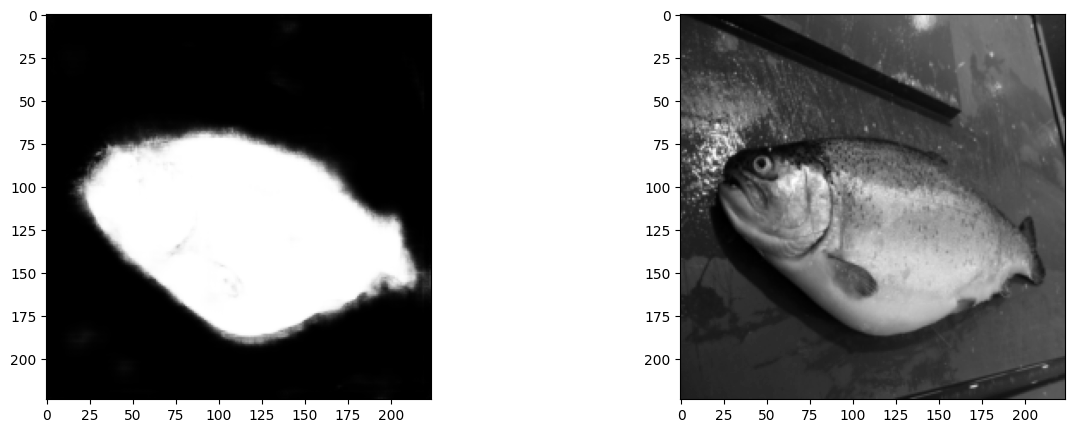

In [76]:
# Move predictions to CPU and convert to numpy
predictions_cpu = predictions[3].squeeze().cpu().numpy()
original = image[3].squeeze().cpu().numpy()

fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].imshow(predictions_cpu, cmap = "gray")
axis[1].imshow(original, cmap = "gray")
plt.show()


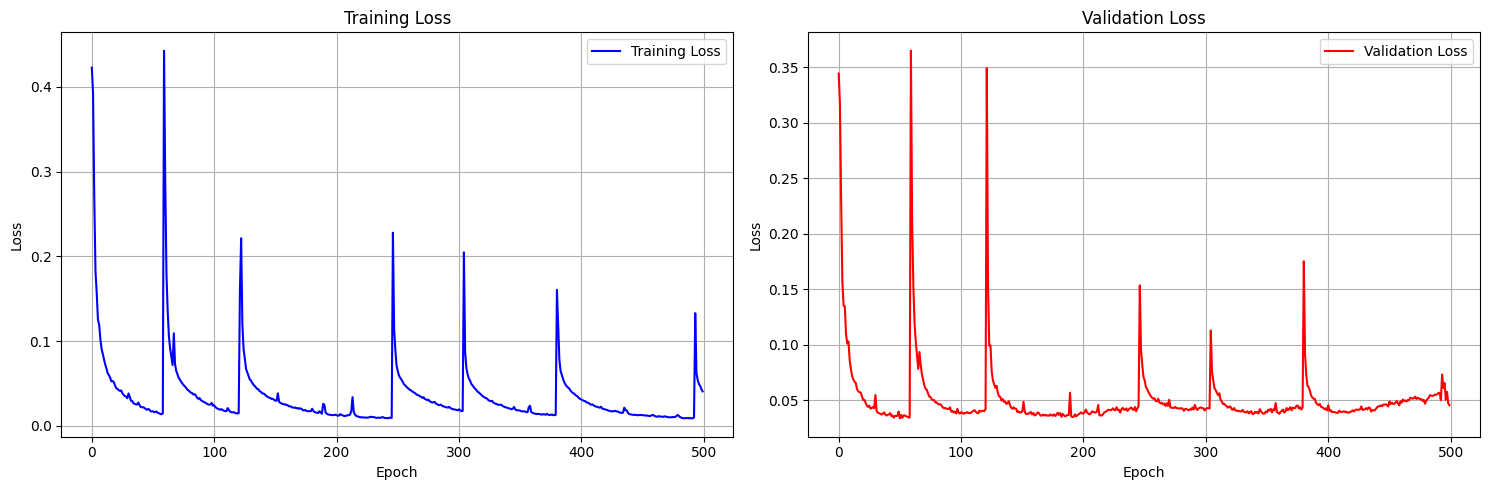

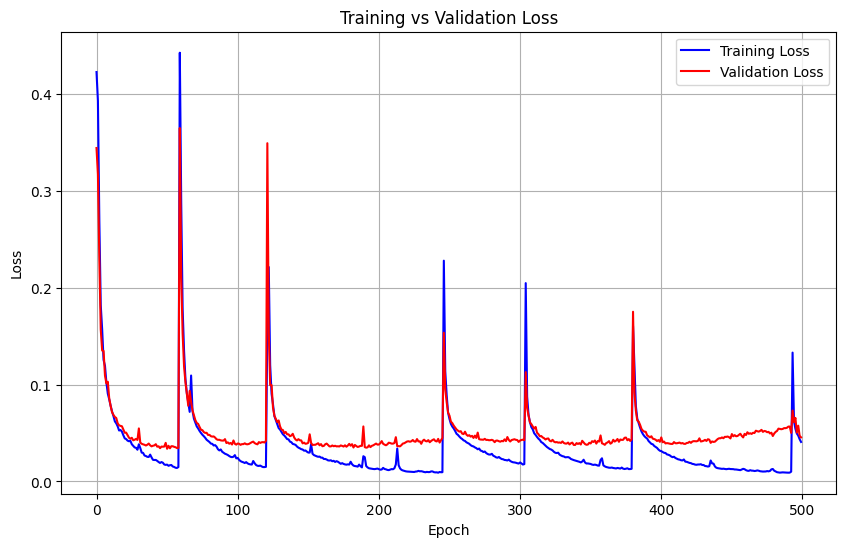

In [72]:
# train_loss, valid_loss = train(model, 2, train_dataloaders, valid_dataloaders, optimizer)

fig, axis = plt.subplots(1, 2, figsize=(15, 5))

# Training loss plot
axis[0].plot(train_loss, label='Training Loss', color='blue')
axis[0].set_title('Training Loss')
axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Loss')
axis[0].legend()
axis[0].grid(True)

# Validation loss plot
axis[1].plot(valid_loss, label='Validation Loss', color='red')
axis[1].set_title('Validation Loss')
axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('Loss')
axis[1].legend()
axis[1].grid(True)

plt.tight_layout()
plt.show()

# Optional: Combined plot for comparison
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()